**Importing header files**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier as rs
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import  linear_model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings


**Importing dataset**

In [ ]:
df = pd.read_csv("ransomwarenew.csv")
df

,Name,md5,Machine,SizeOfOperationalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,Legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272730,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714290,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909090,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


array([[<Axes: title={'center': 'Machine'}>,
        <Axes: title={'center': 'SizeOfOperationalHeader'}>,
        <Axes: title={'center': 'Characteristics'}>,
        <Axes: title={'center': 'MajorLinkerVersion'}>,
        <Axes: title={'center': 'MinorLinkerVersion'}>,
        <Axes: title={'center': 'SizeOfCode'}>,
        <Axes: title={'center': 'SizeOfInitializedData'}>],
       [<Axes: title={'center': 'SizeOfUninitializedData'}>,
        <Axes: title={'center': 'AddressOfEntryPoint'}>,
        <Axes: title={'center': 'BaseOfCode'}>,
        <Axes: title={'center': 'BaseOfData'}>,
        <Axes: title={'center': 'ImageBase'}>,
        <Axes: title={'center': 'SectionAlignment'}>,
        <Axes: title={'center': 'FileAlignment'}>],
       [<Axes: title={'center': 'MajorOperatingSystemVersion'}>,
        <Axes: title={'center': 'MinorOperatingSystemVersion'}>,
        <Axes: title={'center': 'MajorImageVersion'}>,
        <Axes: title={'center': 'MinorImageVersion'}>,
        <Axes:

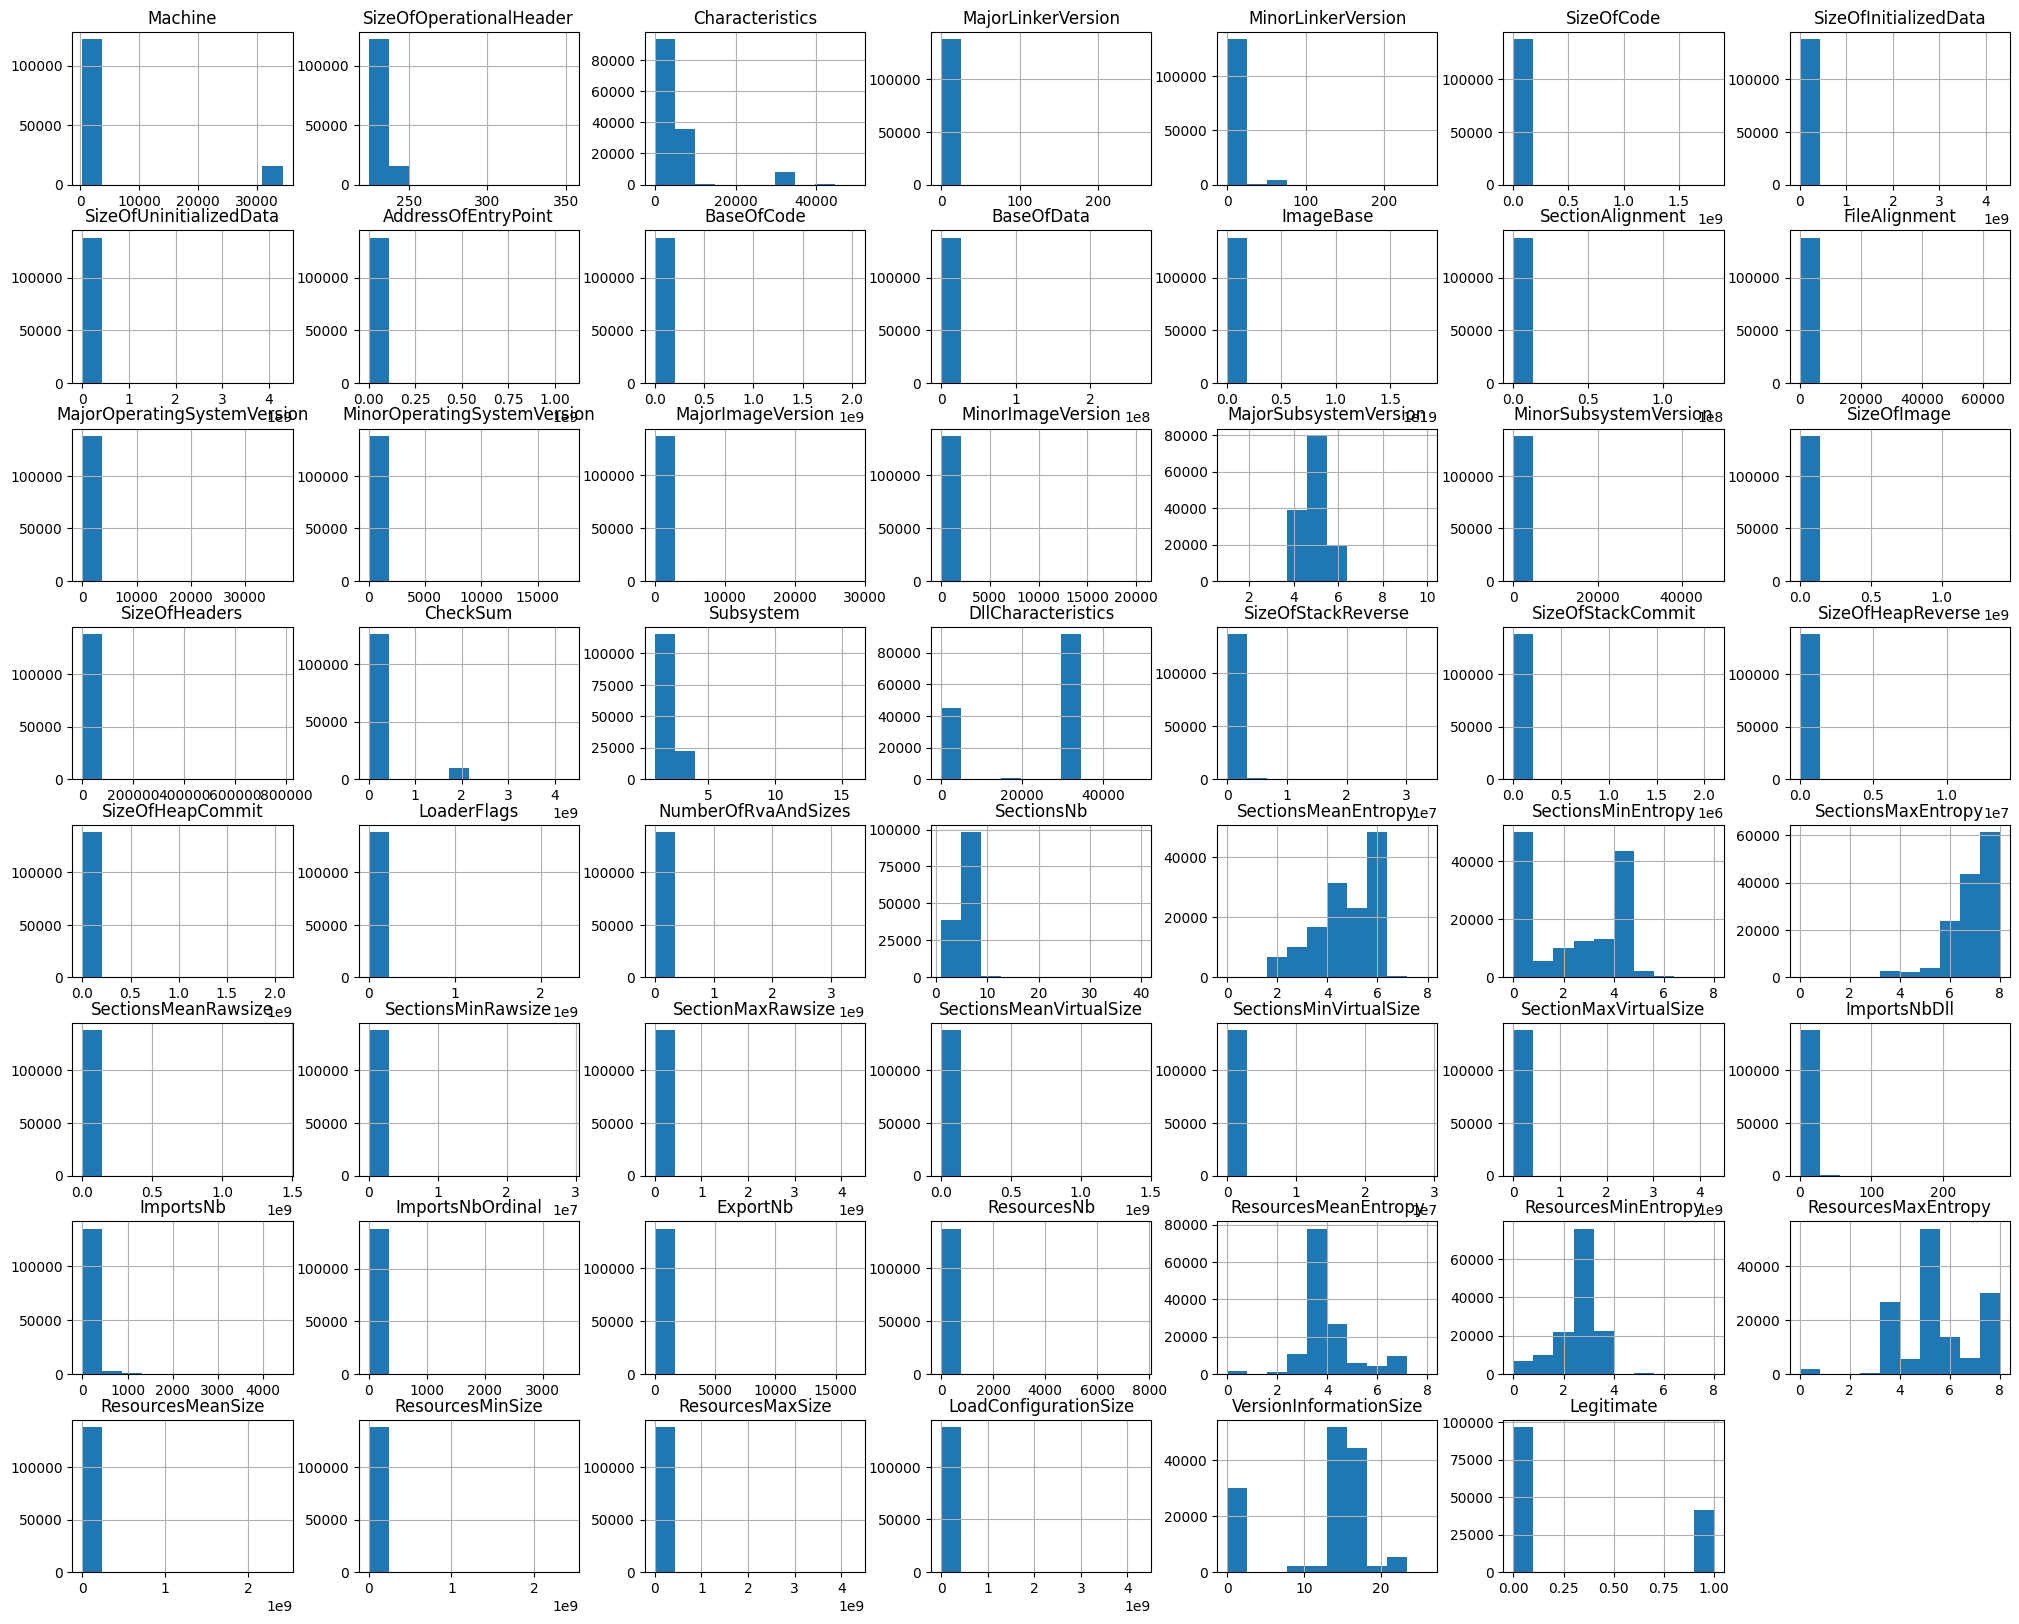

In [ ]:
df.hist(figsize=(25,20))

In [ ]:
df['Legitimate'].value_counts()

0    96724
1    41323
Name: Legitimate, dtype: int64

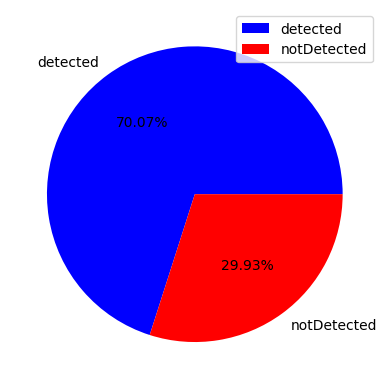

In [ ]:
# plt.style.use('dark_background')
# ax = sns.countplot(x='Legitimate', data=df, hue='Legitimate',color ='blue')
plt.pie(df.Legitimate.value_counts().values.tolist(), labels=['detected','notDetected'], autopct='%.2f%%',colors =['blue','red'])
plt.legend()
plt.show()

In [ ]:
df.shape

(138047, 57)

**Data Pre-processing**

In [ ]:
df.nunique()

Name                           107488
md5                            138047
Machine                             3
SizeOfOperationalHeader             5
Characteristics                   104
MajorLinkerVersion                 41
MinorLinkerVersion                 62
SizeOfCode                       3809
SizeOfInitializedData            3217
SizeOfUninitializedData           441
AddressOfEntryPoint             23110
BaseOfCode                        385
BaseOfData                       1106
ImageBase                        6010
SectionAlignment                   12
FileAlignment                       9
MajorOperatingSystemVersion        12
MinorOperatingSystemVersion        12
MajorImageVersion                  38
MinorImageVersion                  70
MajorSubsystemVersion               6
MinorSubsystemVersion              10
SizeOfImage                      2312
SizeOfHeaders                      30
CheckSum                        81633
Subsystem                           4
DllCharacter

In [ ]:
#dropping columns based on less number of unique values in a column
to_drop = ["Name","md5","CheckSum"]

df.drop(to_drop, inplace = True, axis = 1)

In [ ]:
df

,Machine,SizeOfOperationalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,Legitimate
0,332,224,258,9,0,361984,115712,0,6135,4096,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,332,224,3330,9,0,130560,19968,0,81778,4096,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,332,224,3330,9,0,517120,621568,0,350896,4096,...,11,4.426324,2.846449,5.271813,31102.272730,104,270376,72,18,1
3,332,224,258,9,0,585728,369152,0,451258,4096,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,332,224,258,9,0,294912,247296,0,217381,4096,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,332,224,258,11,0,205824,223744,0,123291,4096,...,7,4.122736,1.370260,7.677091,14900.714290,16,81654,72,0,0
138043,332,224,33167,2,25,37888,185344,0,40000,4096,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,332,224,258,10,0,118272,380416,0,59610,4096,...,22,6.825406,2.617026,7.990487,14981.909090,48,22648,72,14,0
138045,332,224,33166,2,25,49152,16896,0,51216,4096,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


**Finding Correlation among the columns**

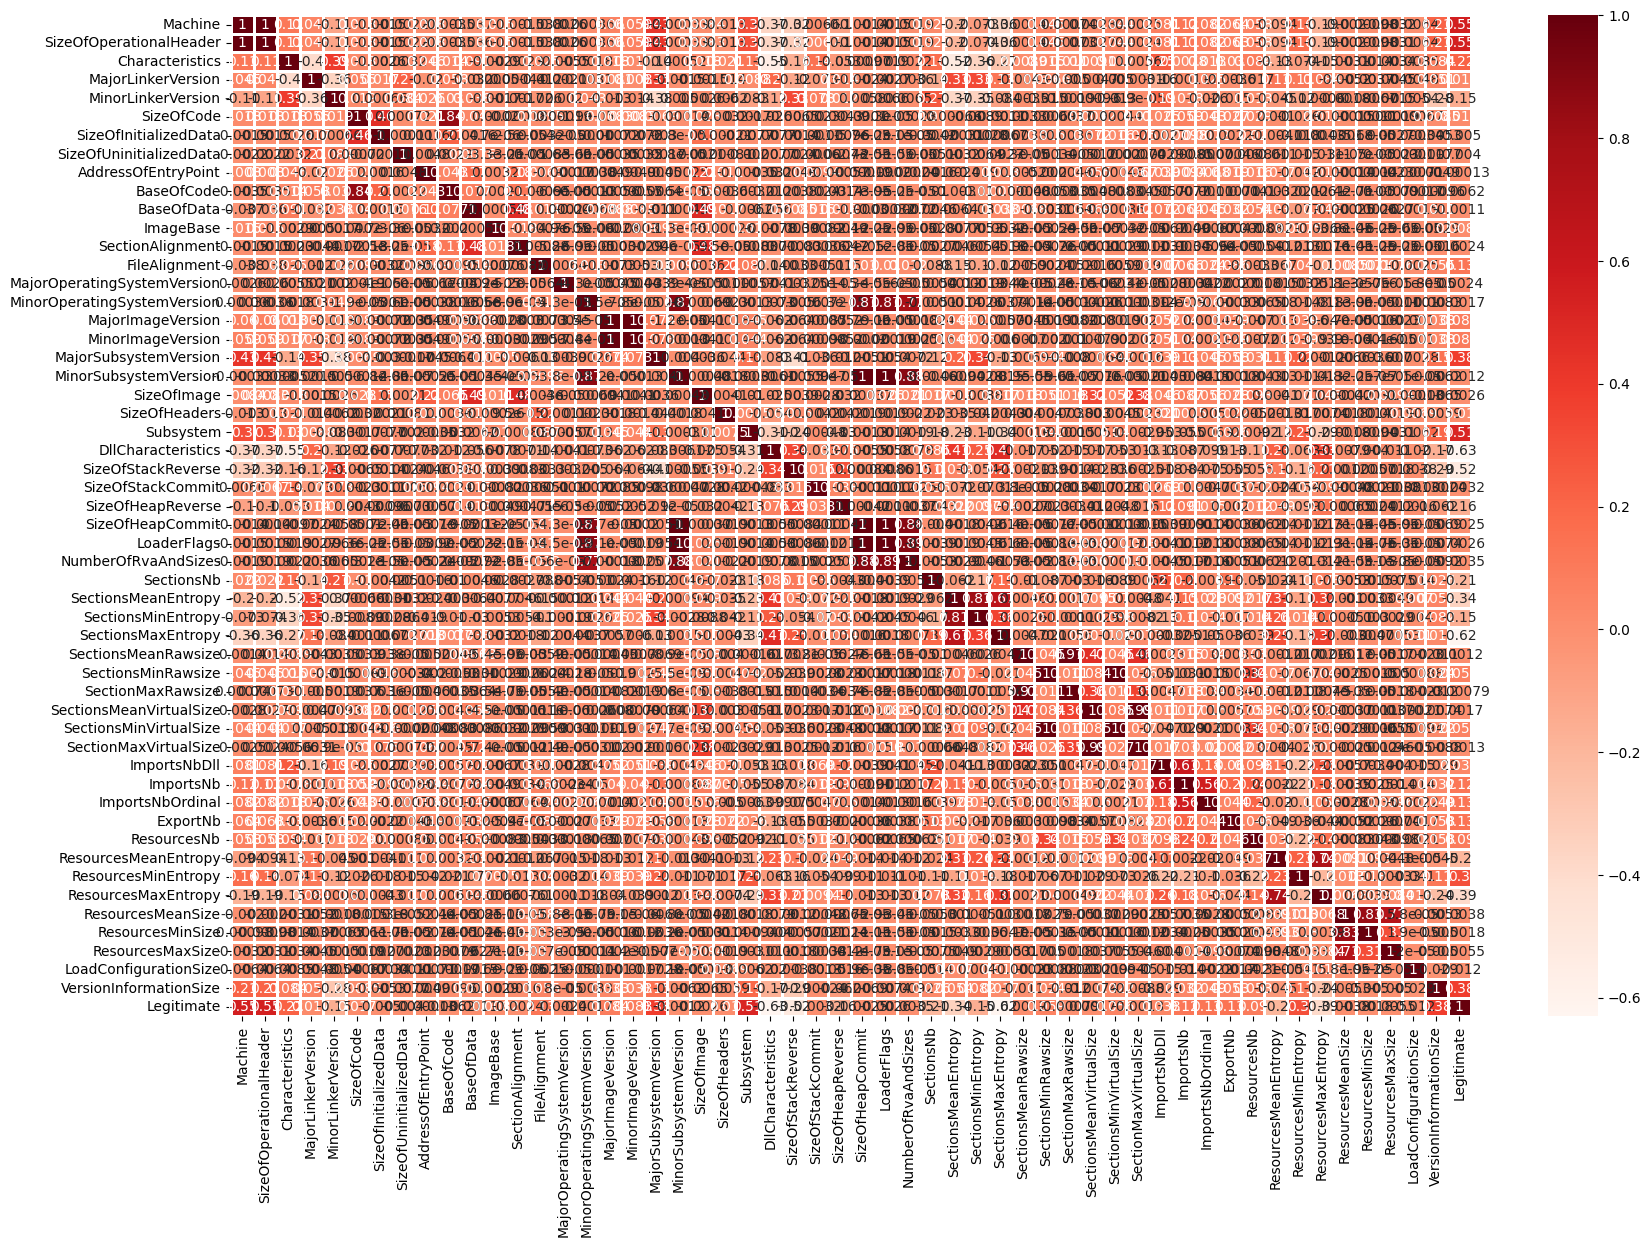

In [ ]:
plt.figure(figsize = (20, 13))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1,cmap='Reds')
plt.show()

In [ ]:
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

# Drop features
df.drop(to_drop, axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Machine                      138047 non-null  int64  
 1   Characteristics              138047 non-null  int64  
 2   MajorLinkerVersion           138047 non-null  int64  
 3   MinorLinkerVersion           138047 non-null  int64  
 4   SizeOfCode                   138047 non-null  int64  
 5   SizeOfInitializedData        138047 non-null  int64  
 6   SizeOfUninitializedData      138047 non-null  int64  
 7   AddressOfEntryPoint          138047 non-null  int64  
 8   BaseOfData                   138047 non-null  int64  
 9   ImageBase                    138047 non-null  float64
 10  SectionAlignment             138047 non-null  int64  
 11  FileAlignment                138047 non-null  int64  
 12  MajorOperatingSystemVersion  138047 non-null  int64  
 13 

**Data encoding**

Since, there are no stringtype columns, data encoding is not performed

**Splitting dataset into x and y**

In [ ]:
df['Legitimate']

0         1
1         1
2         1
3         1
4         1
         ..
138042    0
138043    0
138044    0
138045    0
138046    0
Name: Legitimate, Length: 138047, dtype: int64

In [ ]:
X = df.drop('Legitimate', axis = 1)
y = df['Legitimate']

**Data transformation**

In [ ]:
#scaling the values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale = scaler.fit_transform(X)

In [ ]:
scale

array([[-3.60933655e-01, -5.11331667e-01,  9.29932979e-02, ...,
        -1.07564282e-02, -1.78489476e-02,  5.34926146e-01],
       [-3.60933655e-01, -1.36091319e-01,  9.29932979e-02, ...,
        -1.15506480e-02, -1.78461879e-02,  8.29093388e-01],
       [-3.60933655e-01, -1.36091319e-01,  9.29932979e-02, ...,
         1.11940682e-03, -1.78461879e-02,  8.29093388e-01],
       ...,
       [-3.60933655e-01, -5.11331667e-01,  3.37567319e-01, ...,
        -1.05391896e-02, -1.78461879e-02,  2.40758905e-01],
       [-3.60933655e-01,  3.50833285e+00, -1.61902485e+00, ...,
        -1.15007622e-02, -1.78489476e-02, -1.81841179e+00],
       [-3.60933655e-01, -5.11331667e-01,  5.82141340e-01, ...,
         3.38252842e-03, -1.78461879e-02, -1.81841179e+00]])

In [ ]:
#transferring the scaled data into dataframe
scaled = pd.DataFrame(data = scale, columns = X.columns, index = X.index)
scaled

,Machine,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfData,ImageBase,...,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
0,-0.360934,-0.511332,0.092993,-0.321959,0.020747,-0.015930,-0.006173,-0.048337,0.069178,-0.005389,...,-0.124749,-0.093911,-0.132246,-0.662461,0.164672,-1.241814,-0.005982,-0.010756,-0.017849,0.534926
1,-0.360934,-0.136091,0.092993,-0.321959,-0.019469,-0.020485,-0.006173,-0.026287,-0.035655,-0.005389,...,-0.124749,-0.093911,-0.146898,0.224923,1.209213,-0.276345,-0.007003,-0.011551,-0.017846,0.829093
2,-0.360934,-0.136091,0.092993,-0.321959,0.047706,0.008141,-0.006173,0.052161,0.269484,-0.005389,...,0.479105,-0.089944,-0.080961,0.382935,0.505052,-0.156377,-0.003122,0.001119,-0.017846,0.829093
3,-0.360934,-0.511332,0.092993,-0.321959,0.059629,-0.003870,-0.006173,0.081416,0.263868,-0.005389,...,0.047781,-0.089944,-0.088288,0.327198,0.287862,0.550339,-0.006923,-0.011404,-0.017846,0.829093
4,-0.360934,-0.511332,0.092993,-0.321959,0.009091,-0.009668,-0.006173,0.013241,0.144058,-0.005389,...,-0.009729,-0.089944,-0.146898,0.274914,1.210260,-0.207216,-0.006972,-0.011544,-0.017846,0.829093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,-0.360934,-0.511332,0.582141,-0.321959,-0.006390,-0.010789,-0.006173,-0.014186,-0.003831,-0.005389,...,-0.124749,-0.093911,-0.110267,0.110163,-1.304948,1.349371,-0.005199,-0.007762,-0.017846,-1.818412
138043,-0.360934,3.508455,-1.619025,1.785499,-0.035574,-0.012616,-0.006173,-0.038465,-0.080584,-0.005389,...,-0.124749,-0.093911,0.028934,-0.559278,-0.494035,-0.295190,-0.006224,-0.008423,-0.017849,0.387843
138044,-0.360934,-0.511332,0.337567,-0.321959,-0.021605,-0.003334,-0.006173,-0.032749,-0.045015,-0.005389,...,-0.124749,-0.093911,-0.000371,2.538489,0.223750,1.545563,-0.005189,-0.010539,-0.017846,0.240759
138045,-0.360934,3.508333,-1.619025,1.785499,-0.033616,-0.020632,-0.006173,-0.035196,-0.076840,-0.005389,...,-0.124749,-0.093911,-0.088288,-0.519777,-0.458055,-0.489462,-0.007033,-0.011501,-0.017849,-1.818412


**Training and Testing**




In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size = 0.30)

In [ ]:
X_train

,Machine,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfData,ImageBase,...,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
59575,-0.360934,-0.509744,-0.640729,-0.321959,-0.038065,-0.015832,-0.006111,-0.046387,-0.088072,-0.005389,...,-0.095994,-0.093911,-0.124919,-0.604875,-0.335442,-0.165645,-0.007055,-0.011568,-0.017849,-0.053408
50980,-0.360934,-0.511332,0.582141,-0.321959,-0.035307,-0.000313,-0.006173,-0.045361,-0.080584,-0.005389,...,-0.095994,-0.093911,-0.066309,1.185372,0.596423,1.548394,-0.003420,0.001407,-0.017846,-1.818412
56365,-0.360934,-0.511332,0.337567,-0.321959,-0.021783,-0.002896,-0.006173,-0.033029,-0.045015,-0.005389,...,-0.124749,-0.093911,-0.124919,-0.617608,0.294122,-1.100055,-0.006787,-0.011260,-0.017846,0.240759
124119,-0.360934,-0.511332,0.092993,-0.321959,-0.022405,0.003049,-0.006173,-0.046670,-0.046887,-0.005389,...,-0.095994,-0.093911,-0.117593,0.664062,0.029367,-0.046574,0.002881,0.009672,-0.017846,-1.818412
31930,2.770595,0.461948,0.092993,-0.321959,0.115594,-0.018951,-0.006173,0.015511,-0.101176,-0.005300,...,-0.124749,-0.070110,-0.146898,-0.787777,0.316975,-1.231985,-0.007032,-0.011557,-0.017849,0.682010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108148,-0.360934,-0.509744,-0.640729,-0.321959,-0.037976,-0.013591,-0.006111,-0.046470,-0.088072,-0.005389,...,-0.095994,-0.093911,-0.117593,-0.721284,-0.567951,-0.192059,-0.007052,-0.011560,-0.017849,0.387843
56048,-0.360934,3.508455,-1.619025,1.785499,-0.035574,-0.020705,-0.006173,-0.038465,-0.080584,-0.005389,...,-0.124749,-0.093911,-0.058982,-0.513693,-0.025718,-0.273624,-0.007017,-0.011501,-0.017849,0.387843
126310,-0.360934,-0.511332,0.337567,-0.321959,-0.021249,-0.003115,-0.006173,-0.032180,-0.043143,-0.005389,...,-0.124749,-0.093911,-0.117593,-0.279157,0.029367,-0.127744,-0.006759,-0.011151,-0.017846,0.387843
117497,-0.360934,-0.511332,0.337567,-0.321959,-0.021961,-0.003115,-0.006173,-0.033383,-0.045015,-0.005389,...,-0.124749,-0.093911,0.050913,2.761698,0.029367,1.543967,-0.005622,-0.010805,-0.017846,0.240759


In [ ]:
y_train

59575     0
50980     0
56365     0
124119    0
31930     1
         ..
108148    0
56048     0
126310    0
117497    0
119250    0
Name: Legitimate, Length: 96632, dtype: int64

In [ ]:
X_test

,Machine,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfData,ImageBase,...,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
87620,-0.360934,-0.511332,0.337567,-0.321959,-0.021249,-0.003115,-0.006173,-0.032175,-0.043143,-0.005389,...,-0.124749,-0.093911,-0.117593,-0.242865,0.029367,-0.127744,-0.006759,-0.011151,-0.017846,0.387843
84591,-0.360934,-0.511332,0.582141,-0.321959,0.059451,-0.018098,-0.006173,0.122591,0.172139,-0.005389,...,-0.124749,-0.093911,-0.132246,-0.832189,-0.676744,-0.325838,-0.004904,-0.008423,-0.017849,0.534926
118533,-0.360934,-0.511332,0.337567,-0.321959,-0.021516,-0.003261,-0.006173,-0.032693,-0.045015,-0.005389,...,-0.124749,-0.093911,0.006955,2.553019,0.029367,1.546617,-0.005256,-0.010409,-0.017846,0.387843
82294,-0.360934,-0.511332,-0.151581,-0.321959,-0.040823,-0.006160,-0.006173,-0.048569,-0.095560,-0.005389,...,-0.124749,-0.093911,-0.117593,0.045602,-0.411520,-0.229249,-0.006723,-0.011151,-0.017849,1.564511
66628,-0.360934,-0.528799,-1.863599,-0.321959,-0.035040,-0.019876,-0.006173,-0.040925,-0.080584,-0.005389,...,6.345115,-0.093911,-0.161551,-3.594079,-2.985065,-3.456630,-0.007110,-0.011605,-0.017849,-1.818412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112043,-0.360934,-0.511332,-0.151581,-0.321959,-0.040823,-0.006818,-0.006173,-0.048569,-0.095560,-0.005389,...,-0.124749,-0.093911,-0.117593,-0.537066,-0.413273,-0.229249,-0.006941,-0.011428,-0.017849,1.564511
130694,-0.360934,-0.447326,-0.885303,-0.321959,0.056782,-0.018512,-0.006173,0.814317,0.160907,-0.005389,...,0.335330,1.409502,0.109524,-0.858069,-0.730507,0.836230,0.000616,0.091989,-0.017849,0.829093
40370,-0.360934,0.489309,0.092993,-0.321959,0.268185,-0.015296,-0.006173,0.426264,0.716896,-0.005389,...,-0.124749,0.584410,-0.154225,-0.406323,1.365121,-1.235580,-0.006987,-0.011560,-0.017846,0.534926
82701,-0.360934,-0.511332,0.826715,-0.321959,-0.027655,-0.018658,-0.006173,-0.043858,-0.059992,-0.005389,...,-0.009729,-0.093911,-0.095614,0.212619,0.258985,1.204010,-0.006983,-0.011501,-0.017846,-0.347576


In [ ]:
y_test


87620     0
84591     0
118533    0
82294     0
66628     0
         ..
112043    0
130694    0
40370     1
82701     0
91988     0
Name: Legitimate, Length: 41415, dtype: int64

**Applying Machine learning algorithms**


**1. Support Vector Machine**




In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

y_pred1 = svc.predict(X_test)

In [ ]:
SVC_ACC = metrics.accuracy_score(y_test, y_pred1)*100
print("Accuracy of Support Vector Machine is:",SVC_ACC)

Accuracy of Support Vector Machine is: 98.8917059036581


**2.KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train, y_train)

y_pred2 = knn.predict(X_test)

KNN_ACC = metrics.accuracy_score(y_test, y_pred2)*100
print("Accuracy of KNNeighbours is:",KNN_ACC)

Accuracy of KNNeighbours is: 98.82168296510926


**3. Random Forest**

In [ ]:
rf=rs(n_estimators=100)
rf.fit(X_train,y_train)
y_pred3=rf.predict(X_test)

In [ ]:
RF_ACC = metrics.accuracy_score(y_test, y_pred3)*100
print("Accuracy of Random forest is:",RF_ACC)

Accuracy of Random forest is: 99.45188941204877


**4. Naive Bayes**

In [ ]:
nb = gnb()
nb.fit(X_train,y_train)
y_pred4=nb.predict(X_test)

In [ ]:
NB_ACC = metrics.accuracy_score(y_test, y_pred4)*100
print("Accuracy of Naive byes is:",NB_ACC)

Accuracy of Naive byes is: 55.75516117348786


**5.Decision Tree**

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred5 = dtc.predict(X_test)

In [ ]:
DTC_ACC = metrics.accuracy_score(y_test, y_pred5)*100

In [ ]:
print("Accuracy of Decision Tree is:",DTC_ACC)

Accuracy of Decision Tree is: 99.08004346251357


**6.XGBoost**

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred6 = xgb.predict(X_test)

In [ ]:
XGB_ACC = metrics.accuracy_score(y_test, y_pred6)*100
print("Accuracy of XGBOOST is:",XGB_ACC)


Accuracy of XGBOOST is: 99.46396233248824


**7.Logistic Regression**

In [ ]:
   # create logistic regression object
log = linear_model.LogisticRegression()

In [ ]:
log.fit(X_train, y_train)

# making predictions on the testing set
y_pred7 = log.predict(X_test)

warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
LR_ACC = metrics.accuracy_score(y_test, y_pred7)*100
print("Accuracy of Logistic Regression is:",LR_ACC)


Accuracy of Logistic Regression is: 97.86550766630448


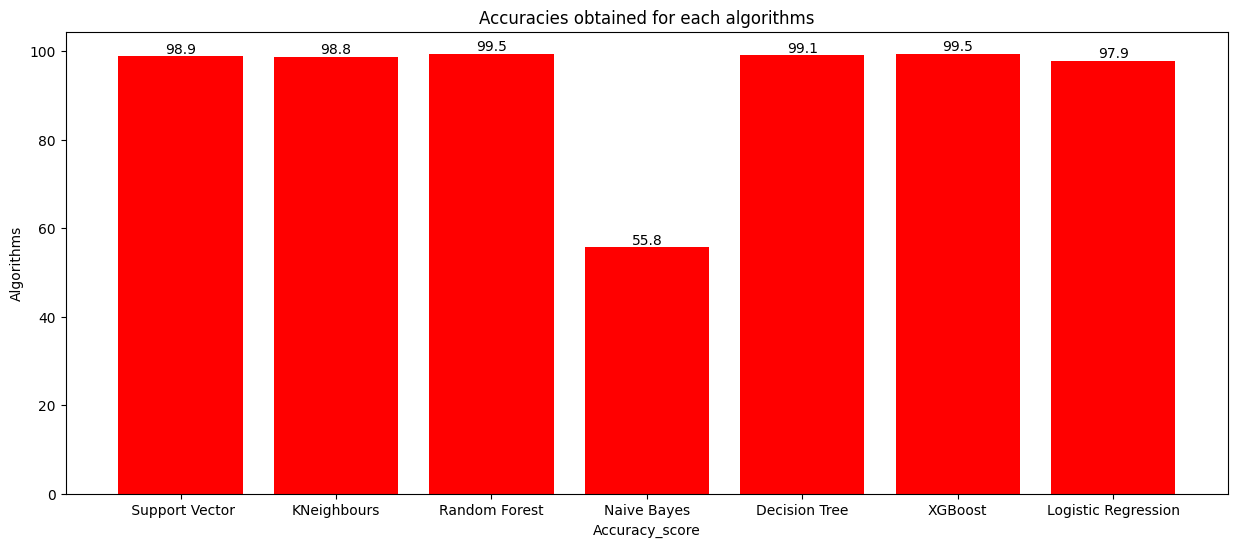

In [ ]:
#Barplot of the results
f, ax = plt.subplots(figsize=(15,6))
ax.set_title("Accuracies obtained for each algorithms")
ax.set_xlabel("Accuracy_score")
ax.set_ylabel("Algorithms")
plt.bar([" Support Vector","KNeighbours","Random Forest", "Naive Bayes","Decision Tree","XGBoost","Logistic Regression"], [SVC_ACC,KNN_ACC,RF_ACC,NB_ACC,DTC_ACC,XGB_ACC,LR_ACC],color='red')
ax.bar_label(ax.containers[0],fmt='%.1f')
plt.show()

**Confusion matrix of SVC**

In [ ]:
cm1 = confusion_matrix(y_test, svc.predict(X_test))
print(cm1)
print(classification_report(y_test, y_pred1))

[[28748   214]
 [  245 12208]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28962
           1       0.98      0.98      0.98     12453

    accuracy                           0.99     41415
   macro avg       0.99      0.99      0.99     41415
weighted avg       0.99      0.99      0.99     41415



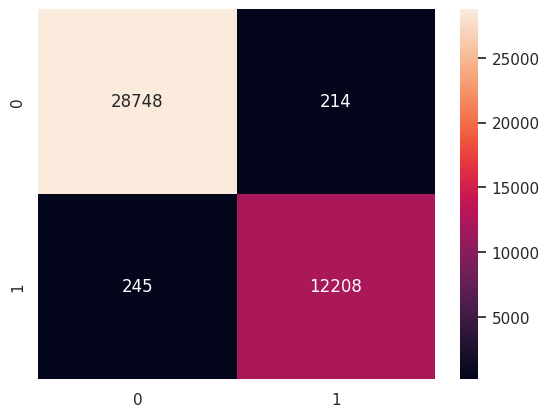

In [ ]:
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(cm1,annot=True, fmt='d')

**Confusion matrix of KNN**

In [ ]:
cm2 = confusion_matrix(y_test, knn.predict(X_test))
print(cm2)
print(classification_report(y_test, y_pred2))

[[28694   268]
 [  220 12233]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28962
           1       0.98      0.98      0.98     12453

    accuracy                           0.99     41415
   macro avg       0.99      0.99      0.99     41415
weighted avg       0.99      0.99      0.99     41415



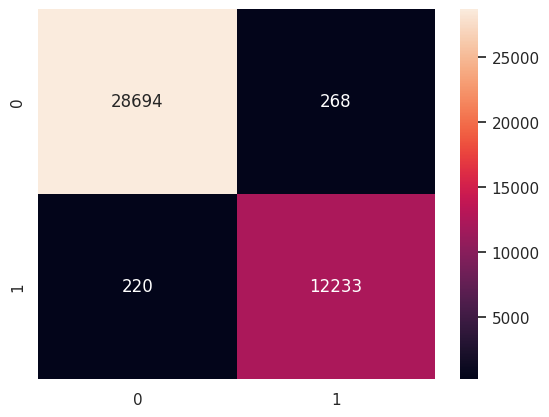

In [ ]:
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(cm2,annot=True, fmt='d')

**Confusion matrix of Random Forest**



In [ ]:
cm3 = confusion_matrix(y_test, rf.predict(X_test))
print(cm3)
print(classification_report(y_test, y_pred3))

[[28838   124]
 [  103 12350]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28962
           1       0.99      0.99      0.99     12453

    accuracy                           0.99     41415
   macro avg       0.99      0.99      0.99     41415
weighted avg       0.99      0.99      0.99     41415



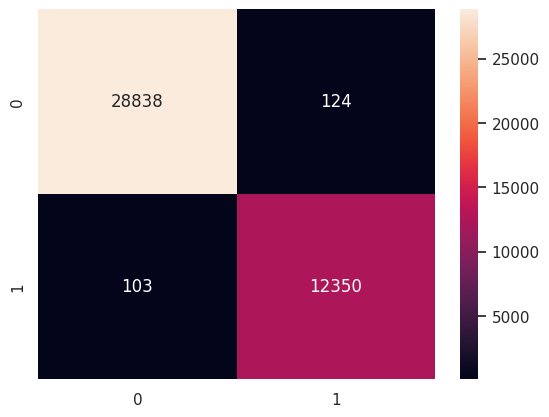

In [ ]:
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(cm3,annot=True, fmt='d')#creating heatmap

**Confusion matrix of Naive bayes**

In [ ]:
cm4 = confusion_matrix(y_test, nb.predict(X_test))
print(cm4)
print(classification_report(y_test, y_pred4))

[[10693 18269]
 [   55 12398]]
              precision    recall  f1-score   support

           0       0.99      0.37      0.54     28962
           1       0.40      1.00      0.58     12453

    accuracy                           0.56     41415
   macro avg       0.70      0.68      0.56     41415
weighted avg       0.82      0.56      0.55     41415



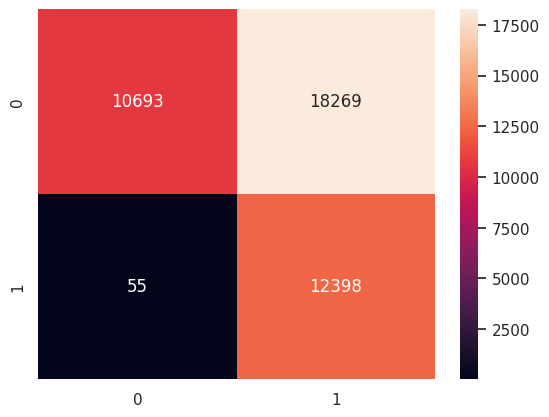

In [ ]:
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(cm4,annot=True, fmt='d')#creating heatmap

**Confusion matrix of Decision Tree**

In [ ]:
cm5 = confusion_matrix(y_test, dtc.predict(X_test))
print(cm5)
print(classification_report(y_test, y_pred5))

[[28765   197]
 [  184 12269]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28962
           1       0.98      0.99      0.98     12453

    accuracy                           0.99     41415
   macro avg       0.99      0.99      0.99     41415
weighted avg       0.99      0.99      0.99     41415



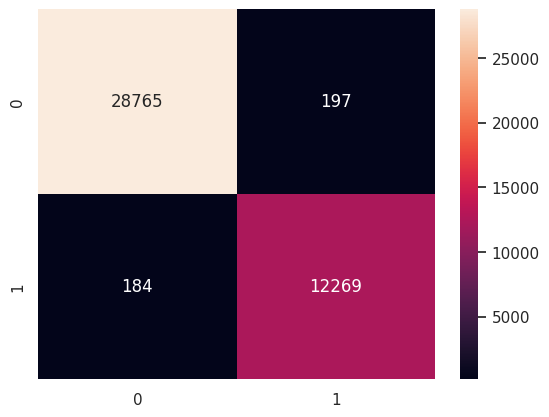

In [ ]:
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(cm5,annot=True, fmt='d')

**Confusion matrix of XGBOOST**

In [ ]:
cm6 = confusion_matrix(y_test, xgb.predict(X_test))
print(cm6)
print(classification_report(y_test, y_pred6))

[[28837   125]
 [   97 12356]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28962
           1       0.99      0.99      0.99     12453

    accuracy                           0.99     41415
   macro avg       0.99      0.99      0.99     41415
weighted avg       0.99      0.99      0.99     41415



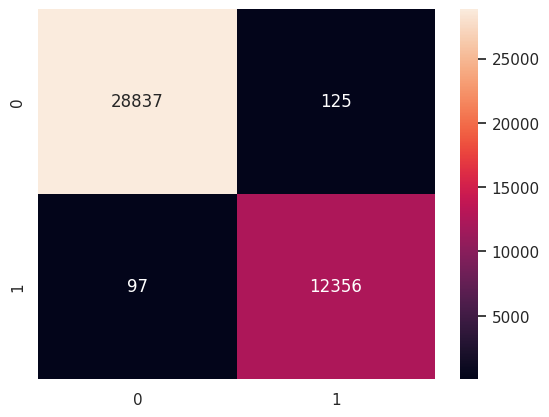

In [ ]:
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(cm6,annot=True, fmt='d')

**Confusion matrix of Logistic Regression**

In [ ]:
cm7 = confusion_matrix(y_test, xgb.predict(X_test))
print(cm7)
print(classification_report(y_test, y_pred7))

[[28837   125]
 [   97 12356]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     28962
           1       0.97      0.96      0.96     12453

    accuracy                           0.98     41415
   macro avg       0.98      0.97      0.97     41415
weighted avg       0.98      0.98      0.98     41415



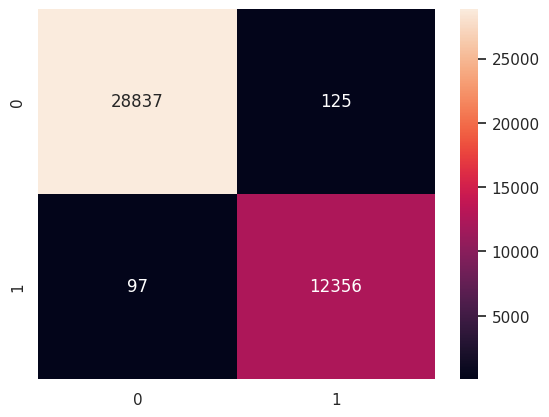

In [ ]:
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(cm7,annot=True, fmt='d')

In [ ]:
eval=pd.DataFrame(np.array(['Support Vector Machine','KNN Classifier','Random Forest Classifier' ,'Naive Bayes','Decision Tree Classifier','XGBOOST','Logistic Regression']))

In [ ]:
eval.columns=['Algorithms']

In [ ]:
eval['Precision']=[0.98, 0.98, 0.99, 0.42, 0.98, 0.99, 0.97]
eval['Recall']=   [0.98, 0.98, 0.99, 1.00, 0.99, 0.99, 0.96]
eval['F1_Score']= [0.98, 0.98, 0.99, 0.59, 0.99, 0.99, 0.97]
eval['Accuracy']= [0.98, 0.98, 0.99, 0.58, 0.99, 0.99, 0.97]

In [ ]:
eval

,Algorithms,Precision,Recall,F1_Score,Accuracy
0,Support Vector Machine,0.98,0.98,0.98,0.98
1,KNN Classifier,0.98,0.98,0.98,0.98
2,Random Forest Classifier,0.99,0.99,0.99,0.99
3,Naive Bayes,0.42,1.00,0.59,0.58
4,Decision Tree Classifier,0.98,0.99,0.99,0.99
5,XGBOOST,0.99,0.99,0.99,0.99
6,Logistic Regression,0.97,0.96,0.97,0.97


Among the 7 models, Random forest, Decison tree and XGBOOST displayed 99.33% ,99.09% ,99.36% of accuracy. So, we apply hyperparameter tuning to these algorithms to tune the models and identify the best model.

**Hyperparameter Tuning of random forest**

In [ ]:
#Random Forest
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': sp_randint(10,100),
    "max_features":sp_randint(1,64),
    'max_depth': sp_randint(5,50),
    "min_samples_split":sp_randint(2,11),
    "min_samples_leaf":sp_randint(1,11),
    "criterion":['gini','entropy']
}
n_iter_search=20 #number of iterations is set to 20, you can increase this number if time permits
clf = rs(random_state=0)
rfrand = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='accuracy')
rfrand.fit(X_train, y_train)
print(rfrand.best_params_)
print("Accuracy:"+ str(rfrand.best_score_)*100)

{'criterion': 'entropy', 'max_depth': 44, 'max_features': 34, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 31}
Accuracy:0.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444660.99311821806444

**Hyperparameter Tuning of Decision Tree**

In [ ]:
clf = DecisionTreeClassifier(random_state=123)
#
# Create Random parameters for hyperparameter tuning
#
params =  {
    'min_samples_leaf': [1, 2, 3,4,5,6,7,8,9,10,11],
    'max_depth': [1, 2, 3,4,5,6,7,8,9,10,11]
}
#
# Create randomizedSEARCH instance
#
dtrand = RandomizedSearchCV(estimator=clf,
                    param_distributions=params,
                    cv=30,
                    n_jobs=1,
                    verbose=2)
#
# Fit the model
#
dtrand.fit(X_train, y_train)
#
# Assess the score
#
print(dtrand.best_params_)
print("Accuracy:"+ str(dtrand.best_score_)*100)

Fitting 30 folds for each of 10 candidates, totalling 300 fits
[CV] END ....................max_depth=3, min_samples_leaf=2; total time=   0.4s
[CV] END ....................max_depth=3, min_samples_leaf=2; total time=   0.4s
[CV] END ....................max_depth=3, min_samples_leaf=2; total time=   0.4s
[CV] END ....................max_depth=3, min_samples_leaf=2; total time=   0.4s
[CV] END ....................max_depth=3, min_samples_leaf=2; total time=   0.4s
[CV] END ....................max_depth=3, min_samples_leaf=2; total time=   0.4s
[CV] END ....................max_depth=3, min_samples_leaf=2; total time=   0.4s
[CV] END ....................max_depth=3, min_samples_leaf=2; total time=   0.4s
[CV] END ....................max_depth=3, min_samples_leaf=2; total time=   0.4s
[CV] END ....................max_depth=3, min_samples_leaf=2; total time=   0.4s
[CV] END ....................max_depth=3, min_samples_leaf=2; total time=   0.4s
[CV] END ....................max_depth=3, min_

**Hyperparameter Tuning of XGBoost**

In [ ]:
classifier = XGBClassifier()


In [ ]:
params = {
"learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
"max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
"min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [ ]:
xgbrand=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
xgbrand.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
print(xgbrand.best_params_)
print("Accuracy:"+ str(xgbrand.best_score_))

{'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.15, 'gamma': 0.3, 'colsample_bytree': 0.5}
Accuracy:0.9997106036312899


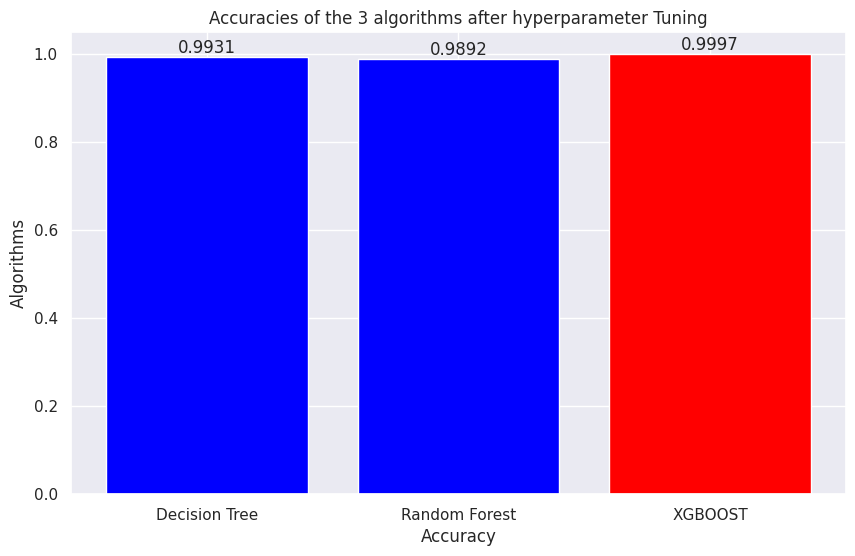

In [ ]:
f, ax = plt.subplots(figsize=(10,6))
ax.set_title("Accuracies of the 3 algorithms after hyperparameter Tuning")
ax.set_xlabel("Accuracy")
ax.set_ylabel("Algorithms")

plt.bar(["Decision Tree", "Random Forest", "XGBOOST"],[rfrand.best_score_,dtrand.best_score_,xgbrand.best_score_],color=['blue','blue','red'] );
ax.bar_label(ax.containers[0],fmt='%.4f')
plt.show()
